<a href="https://colab.research.google.com/github/markoraidlo/T14-Journey-to-zero/blob/leive/Energy_consumption_17_11_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score,f1_score,roc_curve
from sklearn.preprocessing import LabelEncoder
import os
import string
import time
import random
import matplotlib.pyplot as plt

random.seed(10)

In [2]:
from google.colab import drive
#11.11.2022, modified on 17.11.2022
drive.mount('/content/drive')
w0 = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/test.csv', header=0) # actual test
train_w2 = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/train_w2.csv', header=0) # last week -1  of training data
train_w3 = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/train_w3.csv', header=0) # last week -2
#input = pd.read_csv('train.csv', header=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
w1 = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/test_mini.csv', header=0) #last week of training data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


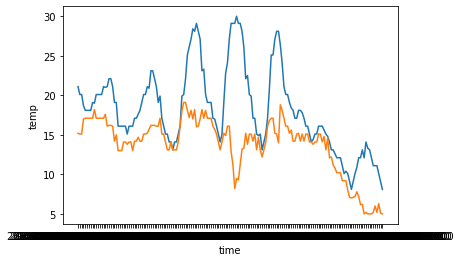

In [4]:
# Seaborn visualization library
import seaborn as sns# Create the default pairplot
sns.lineplot(w0['time'], w0['temp'])
sns.lineplot(w0['time'], w0['dwpt'])
#sns.pairplot(input)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


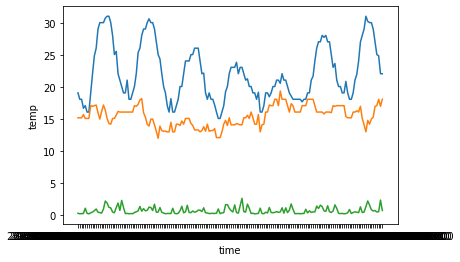

In [5]:
sns.lineplot(w1['time'], w1['temp']) #w1
sns.lineplot(w1['time'], w1['dwpt'])
sns.lineplot(w1['time'], w1['y'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


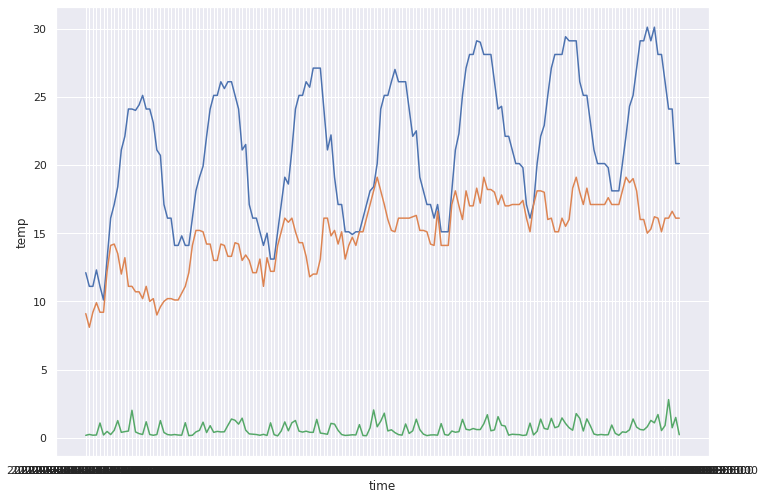

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(train_w2['time'], train_w2['temp']) #w2
sns.lineplot(train_w2['time'], train_w2['dwpt'])
sns.lineplot(train_w2['time'], train_w2['y'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


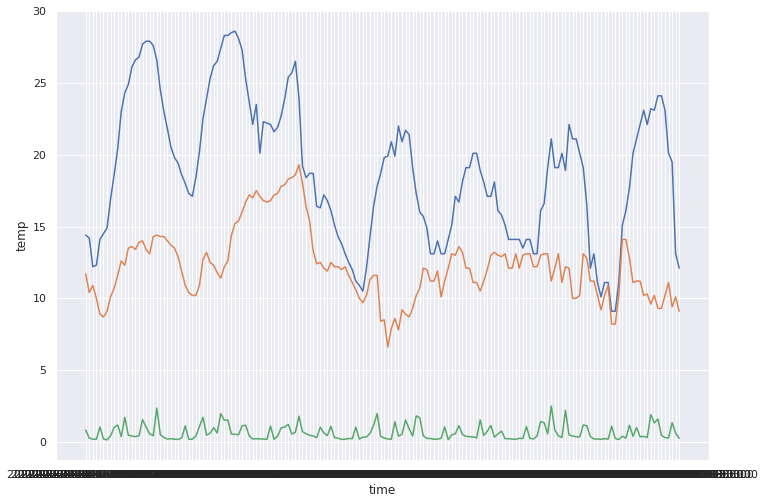

In [7]:
sns.lineplot(train_w3['time'], train_w3['temp']) #w3
sns.lineplot(train_w3['time'], train_w3['dwpt'])
sns.lineplot(train_w3['time'], train_w3['y'])

In [8]:
#actual test data
w0=w0.fillna(0)
w0=w0.round(10)
X =w0[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]  #
#y = input["y"]
X['hours'] = w0.time.str[11:13]
X['hours']=pd.to_numeric(X['hours'])

In [9]:
train_w2=train_w2.fillna(0)
train_w2=train_w2.round(10)
X_train_w2=train_w2[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]  #
y_train_w2 = train_w2["y"]

In [10]:
w1=w1.fillna(0)  #last week
w1=w1.round(10)
X_w1 =w1[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]  #
y_w1 = w1["y"]

In [11]:
train_w3=train_w3.fillna(0)
train_w3=train_w3.round(10)
X_train_w3 =train_w3[["temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"]]  #
y_train_w3 = train_w3["y"]

In [12]:
X_train_w2['hours'] = train_w2.time.str[11:13]
X_train_w2['hours']=pd.to_numeric(X_train_w2['hours'])
X_w1['hours'] = w1.time.str[11:13]
X_w1['hours']=pd.to_numeric(X_w1['hours'])
X_train_w3['hours'] = train_w3.time.str[11:13]
X_train_w3['hours']=pd.to_numeric(X_train_w3['hours'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [13]:
# code from https://towardsdatascience.com/building-rnn-lstm-and-gru-for-time-series-using-pytorch-a46e5b094e7b
def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}' : lambda x: np.sin(2*np.pi*(df[col_name]-start_num)/period),
        f'cos_{col_name}' : lambda x: np.cos(2*np.pi*(df[col_name]-start_num)/period)    
             }
    return df.assign(**kwargs).drop(columns=[col_name])

X_season = generate_cyclical_features(X, 'hours', 24, 0) #actual test
# df_features = generate_cyclical_features(df_features, 'day_of_week', 7, 0)
# df_features = generate_cyclical_features(df_features, 'month', 12, 1)
# df_features = generate_cyclical_features(df_features, 'week_of_year', 52, 0)
X_train_w2_season = generate_cyclical_features(X_train_w2, 'hours', 24, 0)
X_w1_season = generate_cyclical_features(X_w1, 'hours', 24, 0)
X_train_w3_season = generate_cyclical_features(X_train_w3, 'hours', 24, 0)

X_season

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,sin_hours,cos_hours
0,21.1,15.2,69.0,0.0,0.0,340.0,9.0,9.3,1022.0,2.0,0.25533,0.000000,1.000000
1,20.1,15.1,73.0,0.0,0.0,30.0,6.0,14.8,1022.0,2.0,0.19492,0.258819,0.965926
2,20.1,15.1,73.0,0.0,0.0,320.0,7.0,13.0,1022.0,2.0,0.18853,0.500000,0.866025
3,18.7,17.0,90.0,0.0,0.0,0.0,4.0,11.1,1022.4,4.0,0.19947,0.707107,0.707107
4,18.1,17.1,94.0,0.0,0.0,280.0,7.0,11.1,1022.0,3.0,0.21192,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,11.1,6.0,71.0,0.0,0.0,320.0,19.0,29.6,1016.0,3.0,0.34272,-0.965926,0.258819
164,11.1,5.2,67.0,0.0,0.0,310.0,15.0,24.1,1016.0,3.0,0.33432,-0.866025,0.500000
165,10.1,6.3,77.0,0.0,0.0,290.0,11.0,22.2,1016.9,4.0,0.27233,-0.707107,0.707107
166,9.1,5.1,76.0,0.0,0.0,310.0,15.0,18.5,1016.0,3.0,0.28485,-0.500000,0.866025


In [14]:
#input_test=pd.read_csv('test.csv', header=0)
#X_test =input[["time", "temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres","coco","el_price"]]
#y_test = input["consumption"]
#X_test_mini_seasonal1 =X_test_mini_season[["temp","sin_hours","cos_hours"]]

In [15]:
#X_seasonal1 =X_season[["temp","sin_hours","cos_hours"]]

In [16]:
#from sklearn.model_selection import train_test_split
# splitting the data
#x_train, x_test, y_train, y_test = train_test_split(X_season, y, test_size = 0.1, random_state = 42, shuffle=False)

In [17]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR_all = LinearRegression()
# fitting the training data
LR_all.fit(X_train_w2_season, y_train_w2) #(x_train,y_train)


LinearRegression()

In [18]:
y_pred=LR_all.predict(X_w1_season)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


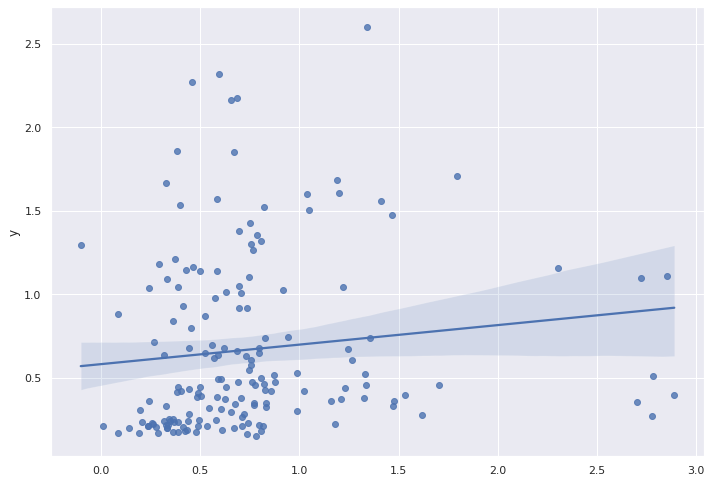

In [19]:
sns.regplot(y_pred,y_w1)

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(y_w1, y_pred)

0.5035471003125348

In [22]:
X_train_w2_season_season1 =X_train_w2_season[["temp","wdir","sin_hours","cos_hours"]]
X_w1_season1 =X_w1_season[["temp","wdir","sin_hours","cos_hours"]]

In [23]:
LR_w2 = LinearRegression()
# fitting the training data
#LR_w2.fit(X_train_w3_season, y_train_mini) #(x_train,y_train)
LR_w2.fit(X_train_w2_season_season1, y_train_w2)
y_pred_w2=LR_w2.predict(X_w1_season1)

In [24]:
mean_squared_error(y_w1, y_pred_w2)

0.2286391631622174

In [25]:
LR_w3 = LinearRegression()
# fitting the training data
LR_w3.fit(X_train_w3_season, y_train_w3) #(x_train,y_train)
#LR_w3.fit(X_train_mini_season1, y_train_mini)
y_pred_w3=LR_w3.predict(X_w1_season) #

In [26]:
mean_squared_error(y_w1, y_pred_w3) #w1

0.28113960747552497

In [27]:
X_train_w3_season1 =X_train_w3_season[["temp","sin_hours","cos_hours"]]  # ,"dwpt","wdir"
X_w1_season1 =X_w1_season[["temp","sin_hours","cos_hours"]] # ,"dwpt","wdir"

In [28]:
LR_w3_1 = LinearRegression()
# fitting the training data
LR_w3_1.fit(X_train_w3_season1, y_train_w3) #(x_train,y_train)
#LR_w3.fit(X_train_mini_season1, y_train_mini)
y_pred_w3_1=LR_w3_1.predict(X_w1_season1) #
mean_squared_error(y_w1, y_pred_w3_1) #w1

0.23495949173264727

In [29]:
y_pred_w2_w3=LR_w3.predict(X_train_w2_season) #
mean_squared_error(y_train_w2, y_pred_w2_w3)

0.22276572442673898

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

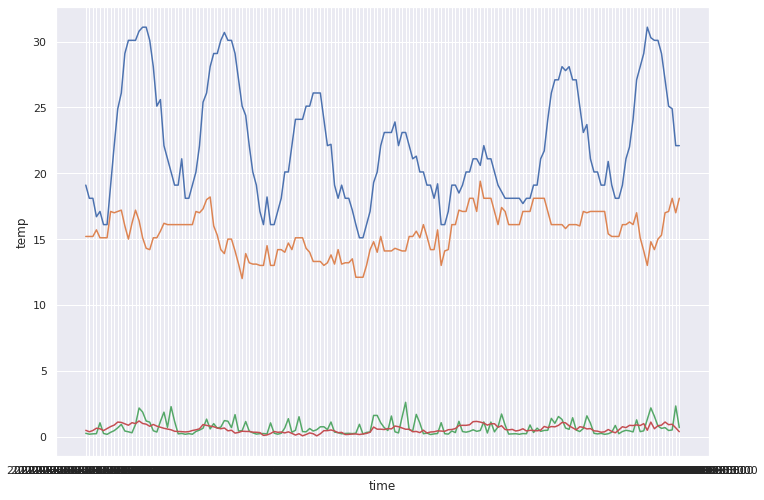

In [30]:
sns.lineplot(w1['time'], w1['temp']) #w1
sns.lineplot(w1['time'], w1['dwpt'])
sns.lineplot(w1['time'], w1['y'])  
sns.lineplot(w1['time'], y_pred_w3) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


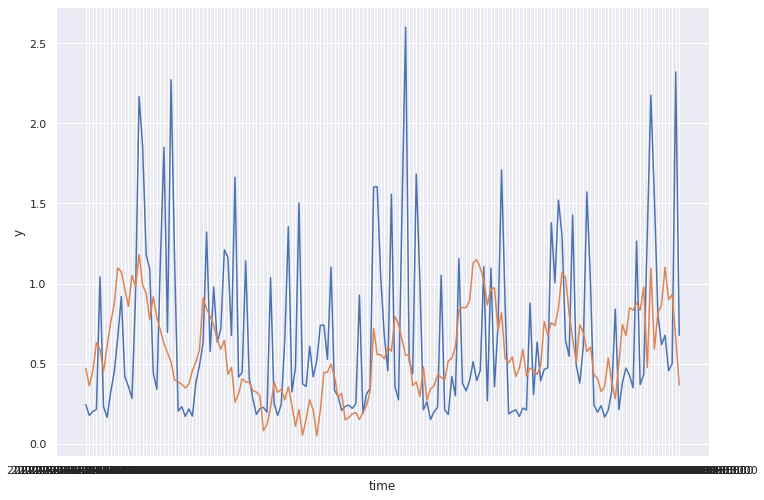

In [31]:
sns.lineplot(w1['time'], w1['y'])  
sns.lineplot(w1['time'], y_pred_w3) 

In [32]:
# for kaggle submission - submitted 17.11
X_season1 =X_season[["temp","wdir","sin_hours","cos_hours"]]
X_w1_season1 =X_w1_season[["temp","wdir","sin_hours","cos_hours"]]

LR = LinearRegression()
# fitting the training data
#LR_w2.fit(X_train_w3_season, y_train_mini) #(x_train,y_train)
LR.fit(X_w1_season1, y_w1)
y_pred_w0=LR.predict(X_season1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


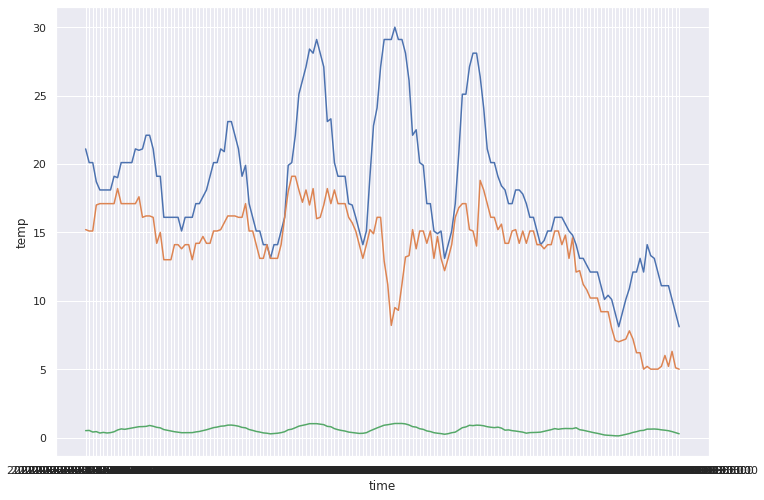

In [34]:
sns.lineplot(w0['time'], w0['temp']) #w0
sns.lineplot(w0['time'], w0['dwpt'])
sns.lineplot(w0['time'], y_pred_w0) 

In [33]:
submission = pd.DataFrame(
    {'time': w0.time, 'consumption': y_pred_w0},
    columns = ['time', 'consumption'])
submission.to_csv('submission_LR_w1.csv', index = False)

In [33]:
#########################################################################
#########################################################################
#### try with seasonality 11.11.2022. Code from Kaggle course time-series (adjusted to our data)

In [34]:
X['hours'] = input.time.str[11:13]

X['weekday'] = pd.to_datetime(input.time.str[:10]).dt.dayofweek
X

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,hours,weekday
0,21.1,15.2,69.0,0.0,0.0,340.0,9.0,9.3,1022.0,2.0,0.25533,00,3
1,20.1,15.1,73.0,0.0,0.0,30.0,6.0,14.8,1022.0,2.0,0.19492,01,3
2,20.1,15.1,73.0,0.0,0.0,320.0,7.0,13.0,1022.0,2.0,0.18853,02,3
3,18.7,17.0,90.0,0.0,0.0,0.0,4.0,11.1,1022.4,4.0,0.19947,03,3
4,18.1,17.1,94.0,0.0,0.0,280.0,7.0,11.1,1022.0,3.0,0.21192,04,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,11.1,6.0,71.0,0.0,0.0,320.0,19.0,29.6,1016.0,3.0,0.34272,19,2
164,11.1,5.2,67.0,0.0,0.0,310.0,15.0,24.1,1016.0,3.0,0.33432,20,2
165,10.1,6.3,77.0,0.0,0.0,290.0,11.0,22.2,1016.9,4.0,0.27233,21,2
166,9.1,5.1,76.0,0.0,0.0,310.0,15.0,18.5,1016.0,3.0,0.28485,22,2


In [35]:
#X.reindex()

In [36]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


In [37]:
input = pd.read_csv('/content/drive/MyDrive/UT_datascience/machinelearning/train.csv', header=0,
    parse_dates=["time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
)
input=input.fillna(0)
input=input.round(10)


In [38]:
input #.info()  #.dtypes

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,consumption
0,2021-08-31 21:00:00+00:00,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,2.0,0.09016,0.577
1,2021-08-31 22:00:00+00:00,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,2.0,0.09251,0.594
2,2021-08-31 23:00:00+00:00,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,2.0,0.08890,0.685
3,2021-09-01 00:00:00+00:00,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,1.0,0.08735,1.016
4,2021-09-01 01:00:00+00:00,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,2.0,0.08688,0.677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,2022-08-24 16:00:00+00:00,27.1,17.0,54.0,0.0,0.0,180.0,4.0,11.1,1020.0,2.0,0.53494,0.678
8588,2022-08-24 17:00:00+00:00,25.1,17.1,61.0,0.0,0.0,220.0,6.0,11.1,1021.0,1.0,0.49990,0.457
8589,2022-08-24 18:00:00+00:00,24.9,18.1,66.0,0.0,0.0,150.0,4.0,9.3,1020.9,4.0,0.43149,0.500
8590,2022-08-24 19:00:00+00:00,22.1,17.0,73.0,0.0,0.0,160.0,6.0,9.3,1021.0,2.0,0.55203,2.321


In [39]:

X =input[["time", "consumption"]]  # ,"temp","dwpt","rhum", "prcp","snow","wdir","wspd","wpgt","pres" ,"coco","el_price"
#y = input["consumption"]
#X['hours'] = input.time.dt.hour
#X['dayofweek'] = input.time.dt.dayofweek
X = X.set_index("time").to_period("H")

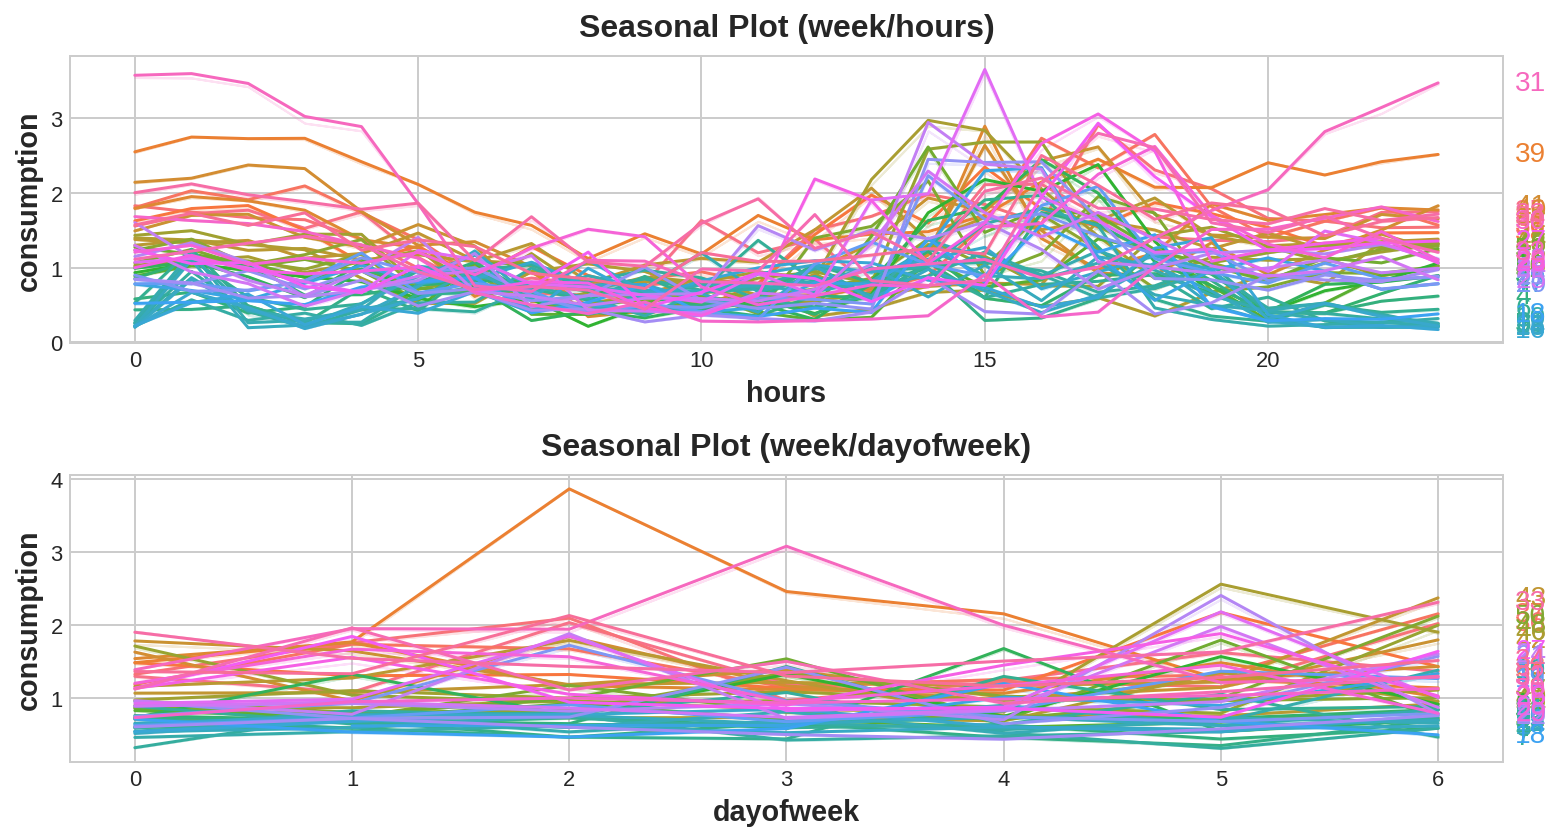

In [40]:
#X = X.set_index("hours").to_period("D")
#X = X.set_index("weekday").to_period("D")


# days within a week
X["hours"] = X.index.hour  # the x-axis (freq)
X["dayofweek"] = X.index.dayofweek  # the x-axis (freq)

X["week"] = X.index.week  # the seasonal period (period)
X["year"] = X.index.year
X["day"] = X.index.day


fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="consumption", period="week", freq="hours", ax=ax0)
#seasonal_plot(X, y="consumption", period="year", freq="dayofweek", ax=ax1);
seasonal_plot(X, y="consumption", period="week", freq="dayofweek", ax=ax1)

# days within a week
#X["day"] = X.index.dayofweek  # the x-axis (freq)
#X["week"] = X.index.week  # the seasonal period (period)

# days within a year
#X["dayofyear"] = X.index.dayofyear
#X["year"] = X.index.year



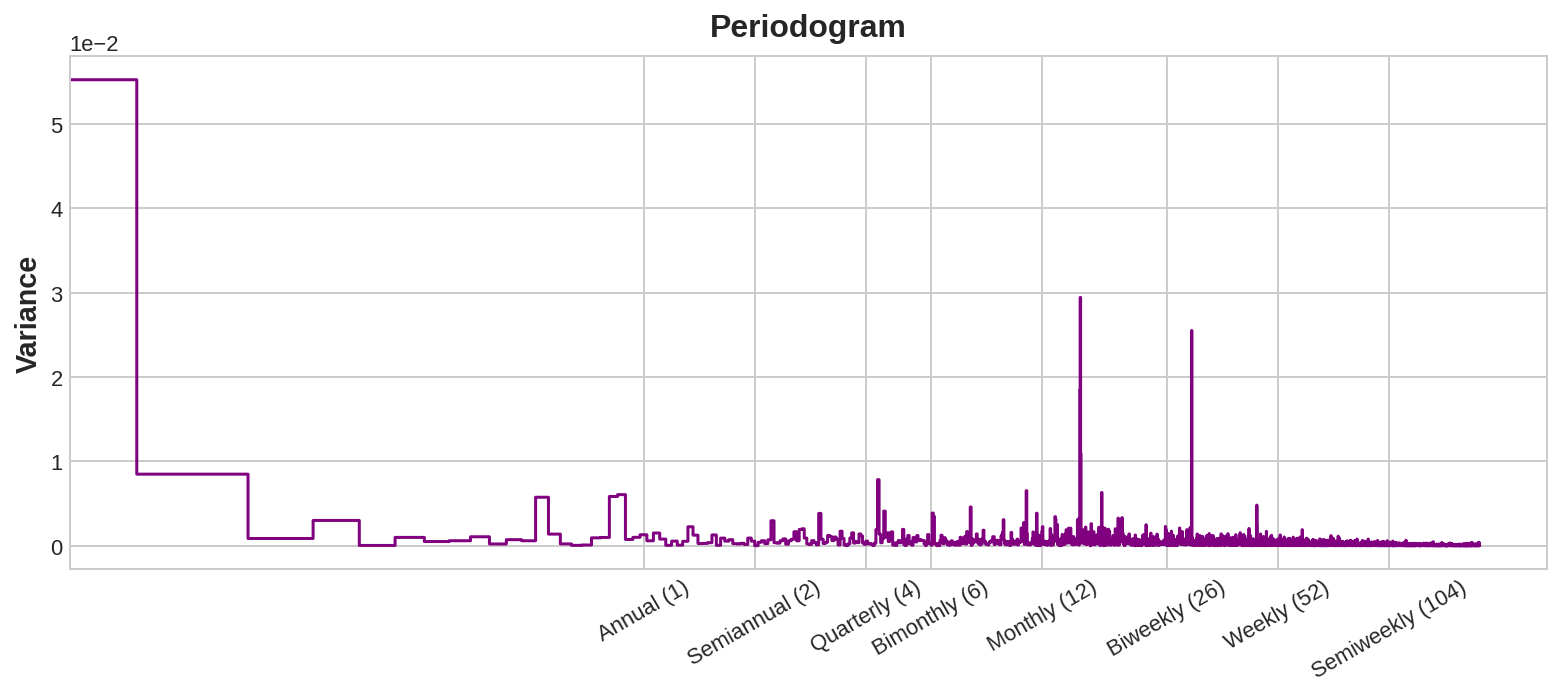

In [41]:
plot_periodogram(X.consumption);

# New Section